<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Александр, доброго дня! рад приветствовать тебя) <br />
(А дальше - шаблонная часть, как ты заметил по другим спринтам)<br>
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

**Импорты**

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMRegressor

## Подготовка

In [2]:
df = pd.read_csv('/datasets/taxi.csv')

data = pd.read_csv('/datasets/taxi.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null object
num_orders    26496 non-null int64
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [4]:
datetime = pd.to_datetime(df['datetime'].values)
df['datetime'] = datetime
data['datetime'] = datetime

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null datetime64[ns]
num_orders    26496 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [6]:
df.set_index('datetime', inplace = True)
data.set_index('datetime', inplace = True)

In [7]:
df.head(10)

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
2018-03-01 00:50:00          21
2018-03-01 01:00:00           7
2018-03-01 01:10:00           5
2018-03-01 01:20:00          17
2018-03-01 01:30:00          12

Ресемплирование данных по 1 часу...

In [8]:
df = df.resample('1H').sum()
data = df.resample('1H').sum()

In [9]:
df.head()

num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43

In [10]:
data = df

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>
есть контакт, ресмплирование за час. <br>
только с mean - на обсуждение: если использовать эту функцию, то ответ получается примерно таким - среднее за 10 минут в одном часе...сложно будет для бизнеса. Лучше sum: тогда звучит так - суммарное количество машин за час.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br>
Действительно, среднее за 10 минут в одном часе - сложно для бизнеса, скорее всего из-за этого я и получил такие "фантастические" результаты в разделе обучение и тестирование моделей...

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>ок, так и есть)

## Анализ

Временной промежуток данных: 2018-03-01 00:00:00 - 2018-08-31 23:00:00.

График разброса данных о заказах такси с применением сглаживания временных рядов.

Разброс значений достаточно большой, поэтому использовал количество окон равное 50, чтобы кривая скользящего среднего была похожа на более-менее четкую линнию...

**Тренды и сезонность**

**Месячная сезонность**

Так как нам даны данные только за половину года, у нас нет возможности сказать, что повышение кривой rolling_mean ближе к осени это тренд или сезонность.

Нет возможности понаблюдать за несколькими полными циклами, которые четко отразят нам существующие тренды и сезонности...

In [11]:
df['rolling_mean'] = df.rolling(24).mean()

In [12]:
df.head()

num_orders  rolling_mean
datetime                                     
2018-03-01 00:00:00         124           NaN
2018-03-01 01:00:00          85           NaN
2018-03-01 02:00:00          71           NaN
2018-03-01 03:00:00          66           NaN
2018-03-01 04:00:00          43           NaN

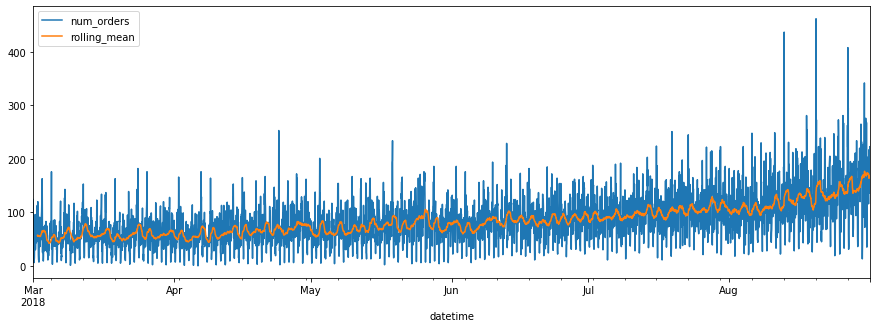

In [13]:
df.plot(figsize=(15, 5))

**Как выглядит ежедневный цикл** - ежедневный цикл

Меньше всего такси вызывают утром, больше всего - днем и ночью

Имеется внутрисуточная сезонность - продажи утром отличаются от продаж вечером

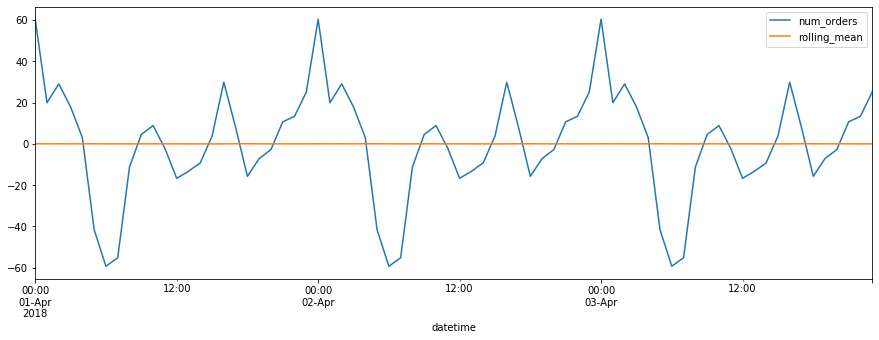

In [14]:
dec_df = df.dropna()

decomposed = seasonal_decompose(dec_df)

decomposed.seasonal['2018-04-01':'2018-04-03'].plot(figsize=(15, 5))

**Как выглядит еженедельный цикл** - дневная сезонность

Нет зависимости от дня недели, дневная сезонность не наблюдается

<Figure size 1440x1440 with 0 Axes>

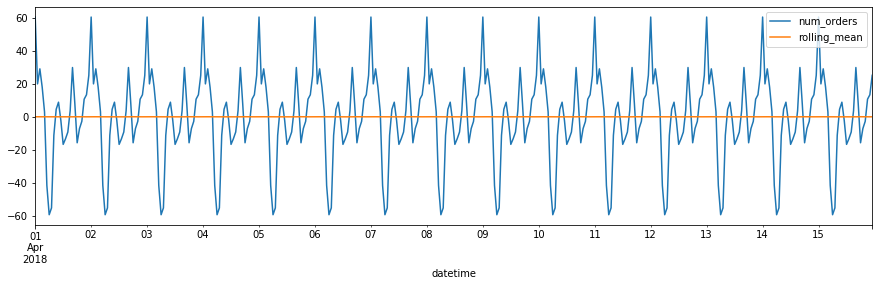

In [15]:
plt.figure(figsize=(20, 20))

decomposed = seasonal_decompose(dec_df)

decomposed.seasonal['2018-04-01':'2018-04-15'].plot(figsize=(15, 4))

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Исследование - понятно.<br>
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - важный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это помогает сделать предвариетльные выводы<br>
    
Хочу озвучить ещё такой момент<br>
В реальности бизнеса есть все три вида сезонности:<br>
1) дневная сезонность -  данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2) внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером <br>
3) месячная сезонность: когда продажи лета и осени - разные.<br><br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то двух сезонности может и хватить.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='blue'><br>
    
Так как я там построил графики по дням, неделям и всему периоду, я немного изменил подписи к ним, используя ваши уточнения по поводу видов сезонности...
    
В целом, исходя из своих наблюдений, я пришел к тому же выводу и ответу на вопрос "этот подъём (восходящий тренд в данных) действительно за счёт роста компании или есть ещё влияние месячной сезнности?", что и вы: можно предположить дневную и внутрисуточную сезонность, но касательно месячной сезонности ответить однозначно нельзя, так как у нас данных меньше года.
    
Задача нашей будущей модели - сделать прогноз на час, что в целом возможно, с имеющимся у нас данными.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>ОК.  А положа руку на сердце - нам хватит и 5-6 последних недель)

**Разности временного ряда**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


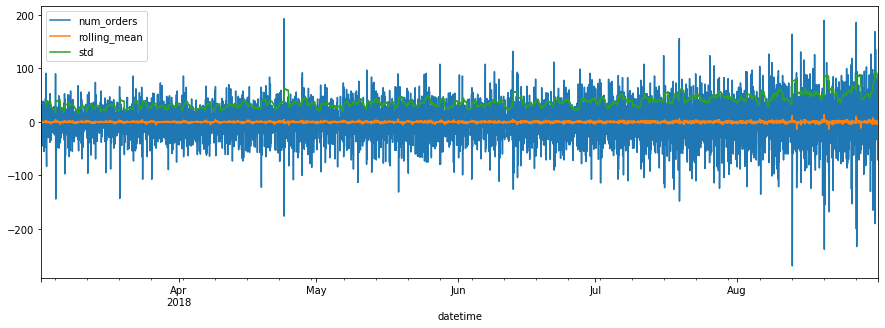

In [16]:
dec_df -= dec_df.shift()
dec_df['std'] = dec_df['num_orders'].rolling(24).std()
dec_df.plot(figsize=(15, 5))

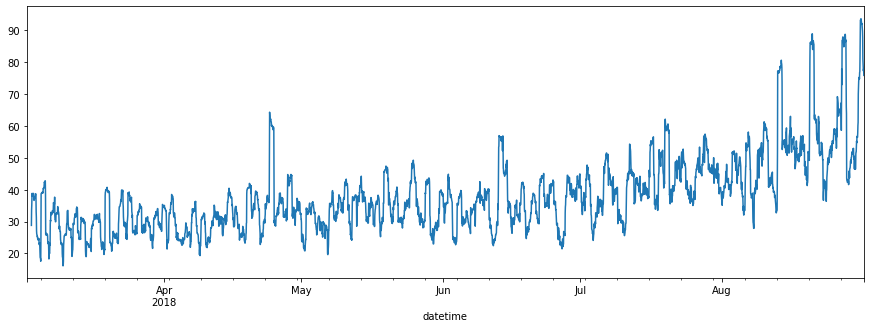

In [17]:
dec_df['std'].plot(figsize=(15, 5))

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
А тут какая цель?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='blue'><br>
    
Разность временного ряда - набор разностей между соседними элементами временного ряда.
    
Это более стационарная величина, чем сам временной ряд ряд.
    
Цель ее построения и визуализации - преобразовать нелинейный тренд в линейный!
    
Но вопросом выше мы вроде все нюансы с трендами и сезонностями уяснили ))

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>ОК, просто это понятие для наших можно и не использовать. А вот в методе АРИМА - используется основательно.

## Обучение

**Разделение на выборки**

In [18]:
data.sort_index(inplace=True)
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

print('Проверка, что все адекватно разделилось:\n')
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

Проверка, что все адекватно разделилось:

2018-03-01 23:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


In [19]:
data = data.drop('rolling_mean', axis=1)
data.head()

num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43

**Создание признаков**

In [20]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()



make_features(data, 2, 24)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

</font></font>
<font color='red'><br>
На мой взгляд: не все факторы подходят, чисто логически. Выскажу свою позицию:<br><br>

1) Фактор год: НЕТ, однозначно не подходит. У нас данных меньше года. Поэтому будет просто константа.<br>
2) Фактор месяц: НЕТ, аналогично году, у нас в истории всего один март, май.... Да и горизоно прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.<br>
3) Фактор день: НЕТ, также не подходит, будет просто последовательность чисел<br>
4) Фактор день недели: ДА, т.к. у нас есть недельная сезонность<br>
5) Фактор час: ДА, т.к. есть часовая (суточная) сезонность.<br>
6) Факто lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
7) Фактор rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда <br>

Как ты думаешь?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='blue'><br>
    
Полностью согласен!
    
Сделал эти признаки на автоматизме, так как так было в тренажере, думал так всегда действуют с временными рядами: разбивают дату и время на подпризнаки, а тут оказывается еще и подпризнаки надо фильтровать, делать самому и в зависимости от задачи их подбирать.
    
Оставляем (больше для себя написал, подытожил):
    
- день недели: ДА, т.к. у нас есть недельная сезонность
    
- час: ДА, т.к. есть часовая (суточная) сезонность
    
- lag: ДА, это параметр авторегрессии - (учёт влияния вчерашних событий на сегодняшние) - получается, учет влияния событий, произошедших n часов назад на нынешний и будущий час?...
    
- rolling: аналог тренда, чем больше окно сглаживания, тем ровнее линия тренда

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>ОК, принято. И однозначно многое зависит от горизонта прогноза и цели прогнозирования!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br> Сразу пару строк о факторе месяц:<br>
Если нам брать горизонт прогноза месяц или два , то фактор месяц - очень важне  это факт. А если брать горизонт прогноза несколько часов, то фактор времени года - на таком отрезке времени и не заметен. К тому же, он уже присутствует в тренде (скользящем среднем). Т.е. его участие локально как бы и есть.<br>

То, что сейчас месяц может увеличивать точность - это случайно. Он ведь представлен как числа от 1 до 8 и ещё есть тренд, как раз. Т.е. произошло наложение тренда и номера месяца. А вот если продажи буду уходить вниз (или перестанут расти), а мы будем продолжать пользовться моделью, то модель будет предсказывать рост на сентябрь (цифра 9), на октябпрь (цифра 10)... т.е. чиссто числовая тенденция)<br>
    
Поэтому, рекомендация для будущих проетов на эту тему:<br>
Учитывать горизонт прогноза: если задача стоит среднесрочного и долгосрочного прогноза, то месяц нам в помощь (при этом данных должно быть не меннее 2-х / 3-х лет). Если задача краткосрочного прогнозирования - месяц не надо использовать, он уже в тренде заложен.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'>Пару строк по фактору лаг и скользящее среднее:<br>
Lag: его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и не много закусили.... повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией также. Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - воалияли на сегоняшние.Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br>
    
По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br>
    
Поэтому, если выставить сезонности - hour и деньНедели, то дополнительные факторы могут быть такие: лаг =1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='blue'><br>
    
Кстати, поменял rolling на 24 в предыдущих графиках ))
    
А в функции - rolling_mean_size = 24, а lag = 2.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>)

In [21]:
#### data.head(10)

In [22]:
#data = data.drop(['year', 'month', 'day', 'dayofweek'], axis = 1)

In [23]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']

features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

In [24]:
print('Скаляризация - уравновешивание признаков...')

scaler = StandardScaler()

features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

Скаляризация - уравновешивание признаков...


***Модель линейной регрессии***

In [25]:
model = LinearRegression()

model.fit(features_train, target_train)

predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)

print("RMSE обучающей выборки:", mean_squared_error(target_train, predictions_train)**0.5)
print("RMSE тестовой выборки: ", mean_squared_error(target_test, predictions_test)**0.5)

RMSE обучающей выборки: 30.880218112304377
RMSE тестовой выборки:  51.268666988640035


***LGBMRegressor***

In [26]:
model1 = LGBMRegressor(random_state=12345, learning_rate = 0.01)
model1.fit(features_train, target_train)

predictions1_train = model1.predict(features_train)
predictions1_test = model1.predict(features_test)

print("RMSE обучающей выборки:", mean_squared_error(target_train, predictions1_train)**0.5)
print("RMSE тестовой выборки: ", mean_squared_error(target_test, predictions1_test)**0.5)

RMSE обучающей выборки: 25.82304999926034
RMSE тестовой выборки:  60.89763592149622


Подбор оптимальных параметров для LGBMRegressor

In [27]:
parametrs = {'learning_rate': [0.01, 0.05, 0.1, 1],
                'n_estimators': range(10, 120, 10)}

In [28]:
scoring = make_scorer(mean_squared_error, greater_is_better=False)

In [29]:
grid = RandomizedSearchCV(model1, parametrs, n_iter = 10, cv=3, scoring = scoring, verbose = 0, random_state = 12345)
grid.fit(features_train, target_train)
grid.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100, 'learning_rate': 0.05}

In [30]:
model1 = LGBMRegressor(random_state=12345, learning_rate = 0.05, n_estimators = 100)
model1.fit(features_train, target_train)

predictions1_train = model1.predict(features_train)
predictions1_test = model1.predict(features_test)

print("RMSE обучающей выборки:", mean_squared_error(target_train, predictions1_train)**0.5)
print("RMSE тестовой выборки: ", mean_squared_error(target_test, predictions1_test)**0.5)

RMSE обучающей выборки: 18.63052751649666
RMSE тестовой выборки:  44.91736350888764


## Тестирование

**Результаты по RMSE**

In [31]:
display(pd.DataFrame(np.array([[mean_squared_error(target_train, predictions_train)**0.5,  mean_squared_error(target_test, predictions_test)**0.5],
                           [mean_squared_error(target_train, predictions1_train)**0.5, mean_squared_error(target_test, predictions1_test)**0.5]]),
                    columns = ['RMSE на обучающей выборке', 'RMSE на тестовой выборке'], index = ['LinearRegression', 'LGBMRegressor']))

RMSE на обучающей выборке  RMSE на тестовой выборке
LinearRegression                  30.880218                 51.268667
LGBMRegressor                     18.630528                 44.917364

**Вывод**

Нам необходимо было обучить от 2ух моделей регрессии, с помощью функций или SearchCV подобрать гиперпараметры и довести метрику RMSE до 48-.

Полученные результаты можно наблюдать в таблице выше и на графиках ниже!



***LinearRegression***

In [32]:
df_plot = test
df_plot['Реальные'] = target_test
df_plot = df_plot.drop(['num_orders', 'dayofweek', 'hour', 'lag_1', 'lag_2', 'rolling_mean'], axis = 1)
df_plot['Предсказанные'] = predictions_test

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


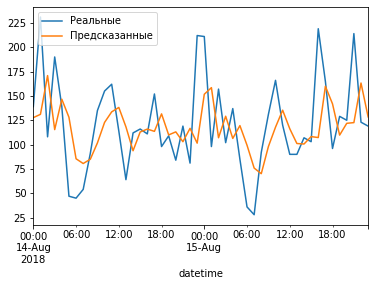

In [33]:
df_plot['2018-08-14':'2018-08-15'].plot()

***LGBMRegressor***

In [34]:
df_plot = test
df_plot['Реальные'] = target_test
df_plot = df_plot.drop(['num_orders', 'dayofweek', 'hour', 'lag_1', 'lag_2', 'rolling_mean'], axis = 1)
df_plot['Предсказанные'] = predictions1_test

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


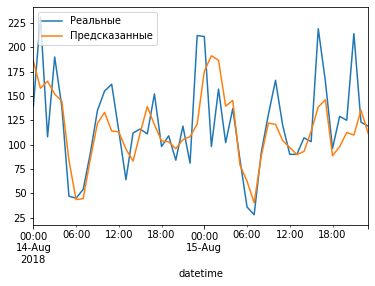

In [35]:
df_plot['2018-08-14':'2018-08-15'].plot()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
ОК, Александр, с модельной частью справился хорошо на самом деле! Просто ресемплирование суммой лучше делать)<br>
Видно, что этот скил (модельный) уже достаточно сильный у тебя.<br>
    
И если сутейно рассуждать, то временные ряды стоят особняком во всём курсе, я бы сказал. Тут чуть иная модельная философия, на мой взгляд. Имменно поэтому позволял себе оставлять большие комментарии, чтобы как-то раскрыть её особенности.<br>
    
Оставил несколько комментариев в тексте. Готов буду ответить на твои вопросы!<br>
<font color='red'>    
Также попрошу вот что:<br>
Выведи, пожалуйста графики факт/предсказанное на одном рисунке (обычный линейный график). Чтобы увидеть где основные не "попадалки" модели. Это один из важнейших инструментов анализа результатов моделирования временных рядов.<br>
Лучше выбрать масштаб, скажем, несколько дней, чтобы увиеть можо было и сравнить каждый час.<br>    
<font color='green'>
Спасибо)<BR>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='blue'><br>
    
СПАСИБО, очень крутые и информативные комментарии, прям то, что нужно!
    
Так то я до этого концепцию +- понял, что это, зачем, как и для чего делается.
    
Я согласен, что тема стоит особняком во всем курсе, но тема очень интересная и важная... одна из самых важных в курсе для понимания вообще того как и где, собственно, применяются модели предсказаний
    
Очень благодарен вам за каждый "разжеванный" в хорошем смысле комментарий, оставленный вами мне для того, чтобы сформировать у меня представление о временных рядах, как нужно смотреть на это, делать и почему.



<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Рад, что мои комментарии"легли на душу" и отозвались в знаниях)<br>
Хотя много мне и не удалось сказать(<br>
Если будет возможность тебе однозначно интересно посмотреть разные практические истории вот здесь:<br>
https://ibf.org/knowledge - заморский институт бизнес-прогнозирования.<br>
Там и статьи можно накопать, и методы посмомтерть...<br>

Есть классический труд (он НЕ ML, а исключительно на эксель). Но для понимания сути временных рядов - то, что надо:<br>
УИЧЕРН "Бизнес-прогнозирование"<br>

Идеологически по системе прогнозирования, интересно почитать<br>
ТОМАС УОЛЛАС, Р. СТАЛЬ "планирование продаж и операций" SO&P<br><br>     

Спасибо) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБЧЕНИЯ!

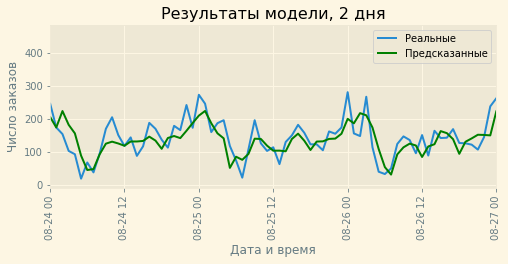

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Хотел бы оставить несколько идей для твоих будущих проектов в этой обоасти<br>

На мой взгляд, в этой теме (временные ряды) главное - необходимо чувствовать исходный ряд продаж, с точки зрения бизнеса, и уже только потом подбирать к нему модели. Каждое колебание временного ряда - это деньги для бизнеса (если говорим что заказчик бизнесовый) и за "трепетами" данных прячутся разные семейства причин. И именно знание их помогут строить хорошие прогнозы..<br>.
Леса, бустинги, регрессии.... могут подобрать хорошие модели на старых данных. Но иногда, как прогноз эти, модели могут оказаться пустышками - не интересными бизнесу. <br>  <br>
Поэтому, от себя позволю добавить несколько идей:<br>
Очень часто ищут "волшебную таблетку" или "кнопку". Нажал и само всё построилось с высокой точностью<br>
Но такого никогода не будет)))<br>
И причиной тому: модели нужно подсказать причины, по которым происходит колебания продаж (временного ряда): понимать причины колебаний треда, понимать аномалии, учитывать акционные продажи, видеть действия конкурентов , закладывать их в модель и т.д. <br><br>
В общем, всё как обычно - три группы факторов: <br>
1)внешние факторы (например выручка такси-компании зависит от количества машин на линии),<br>
2)есть факторы внутри самих данных (Вы использовали как раз поняти лаг, сезонности), <br>
3)есть параметры самих моделей (то, что обычно используется при моделировании леса или деревьев).<br><br>

Ещё важно иметь ввиду горизонт прогноза: на кокой период строить прогноз нужно  - на час вперёд, на неделю, на месяц.<br>
Это также накладывает ограничения на подбор моделей<br>
Я бы рекомендовал Вам составить для себя матрицу  в разрезе: <br>
а)есть тренд/нет тренда; <br>
б)еть сезоннотсь/нет сезонности; <br>
в)какой горизонт прогноза требуется; <br>
г) есть ли у нас дополнительные факторы для модей<br>
На пересечении знаний о моделях легко будет подобрать адкватную модель.
Не все задачи прогнозирования временных рядов можно хорошо решить лесом и еже с ним на основе знаний только факторов ряда... Они хорошо подойдут для коротких горизонтов прогнозирования.... А если горизонт чуть больше: недели, месяцы... то тут надо подключать понимания фаткоров продаж самого бизнеса.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='blue'><br>
    
Вы лучший ревьюер!!!


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>СПАСИБО!!!))<br>
Просто цель нашей школы - чтобы каждый выпускник смог улучшить свою карьеру, а через это и качество своей жизни. И очень хочется быть причастным к этому к этому успеху) 